# Decision Tree

In [1]:
# ---------------------------------------------
# Library
# ---------------------------------------------
import pandas, datetime 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import graphviz

from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.utils import shuffle

In [2]:
# ---------------------------------------------
# Applied functions
# ---------------------------------------------
# To manipulate the dataframe more efficient, 
# using dataframe.apply instead of iterrows

def timestamp_to_class(x):
    in30min = 30*60
    in60min = 2*in30min
    in6hour = 6*in60min
    in12hour = 2*in6hour
    in1day = 2*in12hour
    in1week = 7*in1day
    in1month = 4*in1week
    inhalfyear = (366/2)*in1day
    in1year = 366*in1day

    if x <= in30min:
        return 0
    elif x <= in60min:
        return 1
    elif x <= in6hour:
        return 2
    elif x <= in12hour:
        return 3
    elif x <= in1day:
        return 4
    elif x <= in1week:
        return 5
    elif x <= in1month:
        return 6
    elif x <= inhalfyear:
        return 7
    elif x <= in1year:
        return 8
    else :
        return 9

In [3]:
# Load data form DB
print("Load Data ... ", end = '')
Answer = pandas.read_sql('Answer', "sqlite:///data/QAT_final.db", index_col='index')
Question = pandas.read_sql('Question', "sqlite:///data/QAT_final.db", index_col='index')
Tags = pandas.read_csv("data/Tags.csv")
print("done!")

# Marge tags count
Tags = Tags.groupby("Id").count()
Question = pandas.merge(Question, Tags, on=["Id"])

# Calculate the response time of the first/best answer
Question['FirstAnsTime_timestamp'] = Question['FirstAnsTime'] - Question['CreationDate_to_datetime']
Question['BestAnsTime_timestamp'] = Question['BestAnsTime'] - Question['CreationDate_to_datetime']

# Remove outlier
Question = Question[Question['FirstAnsTime_timestamp'] > 0]
Question = Question[Question['BestAnsTime_timestamp'] > 0]

Load Data ... done!


In [4]:
# Create a subset
df = Question[['Score', 'Title', 'Body', 'Tag', 'FirstAnsTime_timestamp']]

# Convert timestamp to class
df['label'] = df['FirstAnsTime_timestamp'].apply(timestamp_to_class)


In [5]:
df.head()

,Score,Title,Body,Tag,FirstAnsTime_timestamp,label
0,26,7,293,3,7960.0,2
1,144,7,24,4,253.0,0
2,21,3,54,3,4603863.0,7
3,53,5,41,4,3267.0,1
4,49,6,169,4,1669.0,0


In [6]:
# Split data into features and label
mydata = pandas.DataFrame()

for i in range(0, 10):
    mydata = mydata.append(df[df['label'] == i].sample(n=3000))
mydata = shuffle(mydata)

feature_cols = ['Score', 'Title', 'Body', 'Tag']

X = df[feature_cols] 
y = df["label"] 

In [7]:
# Split into training data and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [8]:
# Decision Tree classifer
clf = DecisionTreeClassifier(max_depth=5)

clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5357074669745706


In [9]:
# Display the pplot
text_representation = tree.export_text(clf)

In [10]:
## Text
print(text_representation)

|--- feature_2 <= 186.50
|   |--- feature_0 <= -0.50
|   |   |--- feature_0 <= -1.50
|   |   |   |--- feature_0 <= -3.50
|   |   |   |   |--- feature_3 <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  -3.50
|   |   |   |   |--- feature_3 <= 3.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  3.50
|   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  -1.50
|   |   |   |--- feature_3 <= 3.50
|   |   |   |   |--- feature_3 <= 2.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_3 >  2.50
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  3.50
|   |   |   |   |--- feature_1 <= 8.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_1 >  8.50
|   |   |   |   |   |--- class: 0
|   |--- feature_0 >  -0.50
|   |   |--- feature_3 <= 3.50
|   |   |   |--- feature_0 <= 6.50
|   |   |   |   |--- feature_3 <= 2.50
|   |   |   |   |   |---

[Text(167.4, 199.32, 'X[2] <= 186.5\ngini = 0.673\nsamples = 769937\nvalue = [411282, 71397, 118977, 29667, 32700, 48910, 20046, 22827\n8261, 5870]'),
 Text(83.7, 163.07999999999998, 'X[0] <= -0.5\ngini = 0.649\nsamples = 506457\nvalue = [284242, 43455, 73303, 18731, 19806, 29567, 12722, 15279\n5540, 3812]'),
 Text(41.85, 126.83999999999999, 'X[0] <= -1.5\ngini = 0.498\nsamples = 37320\nvalue = [25824, 3091, 4299, 920, 1003, 1421, 557, 149, 29, 27]'),
 Text(20.925, 90.6, 'X[0] <= -3.5\ngini = 0.437\nsamples = 17158\nvalue = [12672, 1333, 1736, 349, 333, 493, 204, 29, 3, 6]'),
 Text(10.4625, 54.359999999999985, 'X[3] <= 2.5\ngini = 0.343\nsamples = 4334\nvalue = [3483, 295, 332, 60, 47, 66, 40, 8, 1, 2]'),
 Text(5.23125, 18.119999999999976, 'gini = 0.299\nsamples = 2553\nvalue = [2125, 149, 161, 25, 33, 29, 26, 3, 1, 1]'),
 Text(15.693750000000001, 18.119999999999976, 'gini = 0.402\nsamples = 1781\nvalue = [1358, 146, 171, 35, 14, 37, 14, 5, 0, 1]'),
 Text(31.387500000000003, 54.3599999

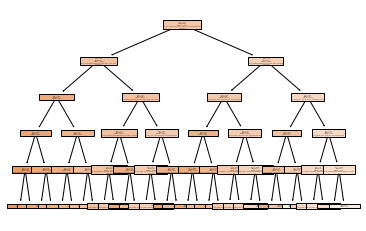

In [11]:
## Graph
tree.plot_tree(clf, filled = True)